# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Gemini_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,1,2024-07-27 12:12:37,"cant scroll bug, poco x3 nfc"
1,Pengguna Google,5,2024-07-27 12:07:56,bagus
2,Pengguna Google,5,2024-07-27 12:04:27,sempurna
3,Pengguna Google,3,2024-07-27 11:56:54,"saya sudah bertanya agar AI mengerti, dengan t..."
4,Pengguna Google,1,2024-07-27 11:34:26,Kadang suka banget error. Mau terjemahkan kali...


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,"cant scroll bug, poco x3 nfc"
1,bagus
2,sempurna
3,"saya sudah bertanya agar AI mengerti, dengan t..."
4,Kadang suka banget error. Mau terjemahkan kali...
...,...
2082,Why can't I log in to my account anymore and i...
2083,Belum support Bahasa Indonesia
2084,Sangat membantu dalam mencari sebuah informasi
2085,agus tapi kenapa ratinh nya 3.0


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2087 non-null   object
dtypes: object(1)
memory usage: 16.4+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2087
unique,1538
top,bagus
freq,74


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2087, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1538, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,"cant scroll bug, poco x3 nfc",cant scroll bug poco x nfc
1,bagus,bagus
2,sempurna,sempurna
3,"saya sudah bertanya agar AI mengerti, dengan t...",saya sudah bertanya agar ai mengerti dengan te...
4,Kadang suka banget error. Mau terjemahkan kali...,kadang suka banget error mau terjemahkan kalim...
...,...,...
2081,Not support Indonesian language,not support indonesian language
2082,Why can't I log in to my account anymore and i...,why cant i log in to my account anymore and it...
2083,Belum support Bahasa Indonesia,belum support bahasa indonesia
2084,Sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "agus" : "bagus",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,"cant scroll bug, poco x3 nfc",cant scroll bug poco x nfc,cant scroll bug poco x nfc
1,bagus,bagus,bbagus
2,sempurna,sempurna,sempurna
3,"saya sudah bertanya agar AI mengerti, dengan t...",saya sudah bertanya agar ai mengerti dengan te...,saya sudah bertanya agar ai mengerti dengan te...
4,Kadang suka banget error. Mau terjemahkan kali...,kadang suka banget error mau terjemahkan kalim...,kadang suka banget error mau terjemahkan kalim...
...,...,...,...
2081,Not support Indonesian language,not support indonesian language,not support indonesian language
2082,Why can't I log in to my account anymore and i...,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...
2083,Belum support Bahasa Indonesia,belum support bahasa indonesia,belum support bahasa indonesia
2084,Sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,"cant scroll bug, poco x3 nfc",cant scroll bug poco x nfc,cant scroll bug poco x nfc,cant scroll bug poco x nfc
1,bagus,bagus,bbagus,bbagus
2,sempurna,sempurna,sempurna,sempurna
3,"saya sudah bertanya agar AI mengerti, dengan t...",saya sudah bertanya agar ai mengerti dengan te...,saya sudah bertanya agar ai mengerti dengan te...,sudah bertanya agar ai mengerti teratur detail...
4,Kadang suka banget error. Mau terjemahkan kali...,kadang suka banget error mau terjemahkan kalim...,kadang suka banget error mau terjemahkan kalim...,kadang banget error mau terjemahkan kalimat ma...
...,...,...,...,...
2081,Not support Indonesian language,not support indonesian language,not support indonesian language,not support indonesian language
2082,Why can't I log in to my account anymore and i...,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...
2083,Belum support Bahasa Indonesia,belum support bahasa indonesia,belum support bahasa indonesia,belum support bahasa indonesia
2084,Sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi,membantu dalam mencari sebuah informasi


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,"cant scroll bug, poco x3 nfc",cant scroll bug poco x nfc,cant scroll bug poco x nfc,cant scroll bug poco x nfc,"[cant, scroll, bug, poco, x, nfc]"
1,bagus,bagus,bbagus,bbagus,[bbagus]
2,sempurna,sempurna,sempurna,sempurna,[sempurna]
3,"saya sudah bertanya agar AI mengerti, dengan t...",saya sudah bertanya agar ai mengerti dengan te...,saya sudah bertanya agar ai mengerti dengan te...,sudah bertanya agar ai mengerti teratur detail...,"[sudah, bertanya, agar, ai, mengerti, teratur,..."
4,Kadang suka banget error. Mau terjemahkan kali...,kadang suka banget error mau terjemahkan kalim...,kadang suka banget error mau terjemahkan kalim...,kadang banget error mau terjemahkan kalimat ma...,"[kadang, banget, error, mau, terjemahkan, kali..."
...,...,...,...,...,...
2081,Not support Indonesian language,not support indonesian language,not support indonesian language,not support indonesian language,"[not, support, indonesian, language]"
2082,Why can't I log in to my account anymore and i...,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...,"[why, cant, i, log, in, to, my, account, anymo..."
2083,Belum support Bahasa Indonesia,belum support bahasa indonesia,belum support bahasa indonesia,belum support bahasa indonesia,"[belum, support, bahasa, indonesia]"
2084,Sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi,sangat membantu dalam mencari sebuah informasi,membantu dalam mencari sebuah informasi,"[membantu, dalam, mencari, sebuah, informasi]"


# **Stemming**

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Gemini_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Gemini_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,cant scroll bug poco x nfc
1,bbagus
2,sempurna
3,sudah tanya agar ai erti atur detail tapi jawa...
4,kadang banget error mau terjemah kalimat malah...
...,...
1533,not support indonesian language
1534,why cant i log in to my account anymore and it...
1535,belum support bahasa indonesia
1536,bantu dalam cari buah informasi


# **Translate**

In [21]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadat

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Gemini_1.csv', encoding = 'latin1')


In [24]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 2.98MB/s]                   


In [26]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

,steamming
0,cant scroll bug poco x nfc
1,bbagus
2,sempurna
3,sudah tanya agar ai erti atur detail tapi jawa...
4,kadang banget error mau terjemah kalimat malah...
...,...
1533,not support indonesian language
1534,why cant i log in to my account anymore and it...
1535,belum support bahasa indonesia
1536,bantu dalam cari buah informasi


In [27]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Gemini_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Gemini_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,cant scroll bug poco x nfc,cant scroll bug poco x nfc
1,bbagus,That's good.
2,sempurna,Perfect.
3,sudah tanya agar ai erti atur detail tapi jawa...,"fontcolor="" # FFFF00""has asked for fontcolor=""..."
4,kadang banget error mau terjemah kalimat malah...,I can always respond to i cant assistant you w...
...,...,...
1533,not support indonesian language,not support in English language
1534,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...
1535,belum support bahasa indonesia,No Indonesian support.
1536,bantu dalam cari buah informasi,help in searching for information fruits


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Gemini_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,cant scroll bug poco x nfc,cant scroll bug poco x nfc
1,bbagus,That's good.
2,sempurna,Perfect.
3,sudah tanya agar ai erti atur detail tapi jawa...,"fontcolor="" # FFFF00""has asked for fontcolor=""..."
4,kadang banget error mau terjemah kalimat malah...,I can always respond to i cant assistant you w...
...,...,...
1533,not support indonesian language,not support in English language
1534,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...
1535,belum support bahasa indonesia,No Indonesian support.
1536,bantu dalam cari buah informasi,help in searching for information fruits


In [30]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [31]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [32]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 812
Netral = 606
Negatif = 120

Total Data Seluruhnya : 1538


In [33]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,cant scroll bug poco x nfc,cant scroll bug poco x nfc,Netral
1,bbagus,That's good.,Positif
2,sempurna,Perfect.,Positif
3,sudah tanya agar ai erti atur detail tapi jawa...,"fontcolor="" # FFFF00""has asked for fontcolor=""...",Negatif
4,kadang banget error mau terjemah kalimat malah...,I can always respond to i cant assistant you w...,Netral
...,...,...,...
1533,not support indonesian language,not support in English language,Netral
1534,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...,Positif
1535,belum support bahasa indonesia,No Indonesian support.,Netral
1536,bantu dalam cari buah informasi,help in searching for information fruits,Netral


In [34]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



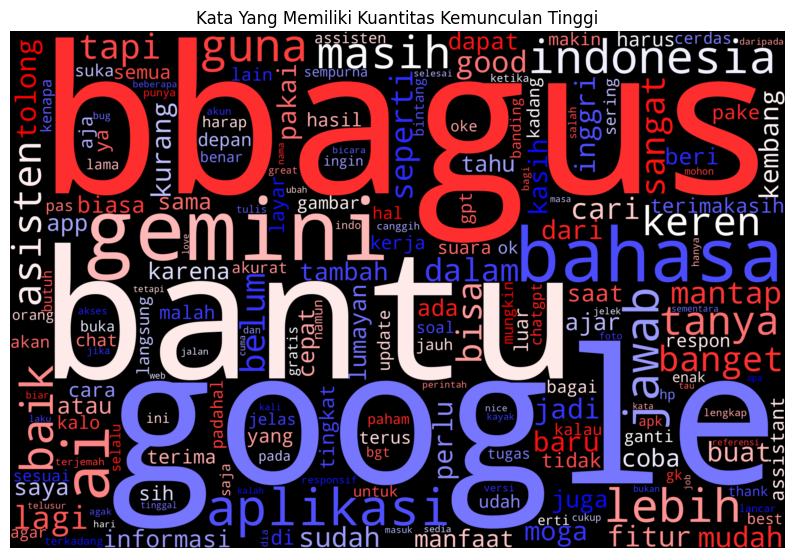

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

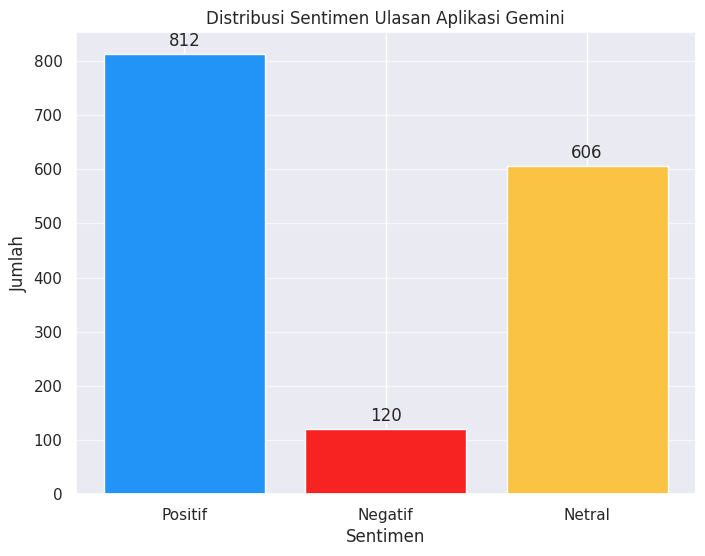

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Gemini")

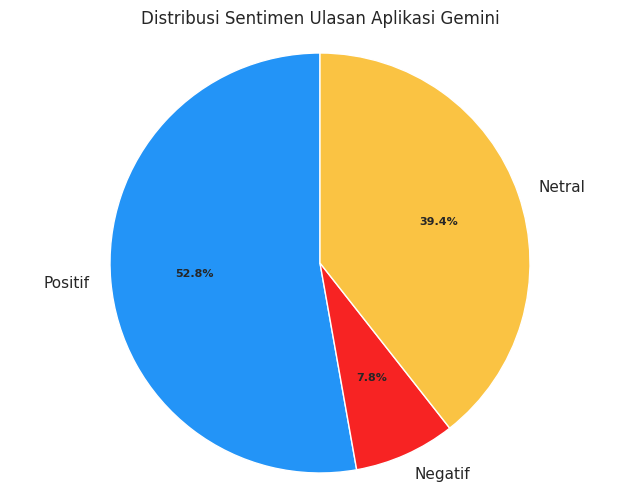

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Gemini")

In [38]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
1,bbagus,That's good.,Positif
2,sempurna,Perfect.,Positif
3,sudah tanya agar ai erti atur detail tapi jawa...,"fontcolor="" # FFFF00""has asked for fontcolor=""...",Negatif
6,jauh dari kata baik sekali saya tanya gemini b...,Far from being a good word. I asked you if you...,Positif
7,mantap,Steady.,Positif
...,...,...,...
1527,moga google assist gemini gabung biar translat...,Google asist gemini join let's translate the s...,Positif
1529,lebih mudah pakai responsif bbagus hasil tampi...,It's easier to respond. It's better to perform...,Positif
1532,belum sempurna,It's not perfect yet.,Negatif
1534,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...,Positif


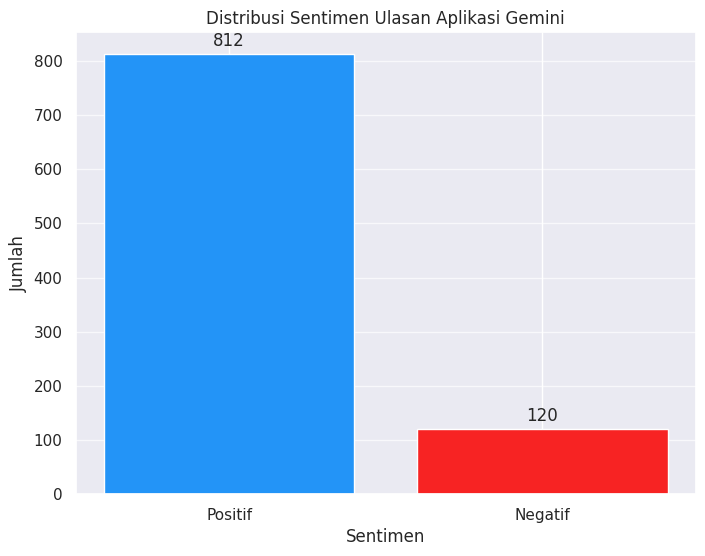

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Gemini")

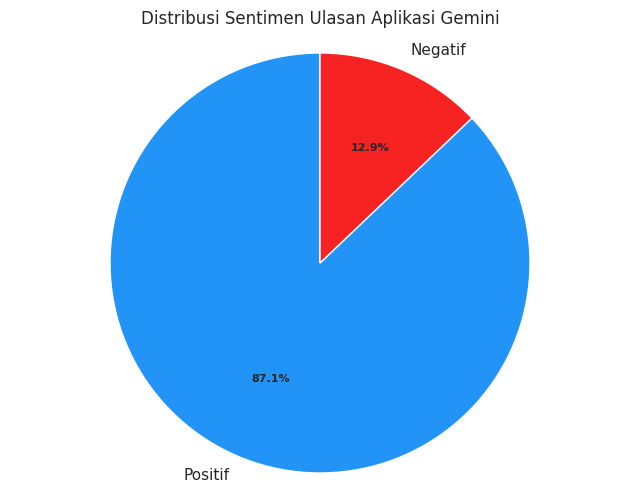

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Gemini")

In [41]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
1,bbagus,That's good.,0
2,sempurna,Perfect.,0
3,sudah tanya agar ai erti atur detail tapi jawa...,"fontcolor="" # FFFF00""has asked for fontcolor=""...",1
6,jauh dari kata baik sekali saya tanya gemini b...,Far from being a good word. I asked you if you...,0
7,mantap,Steady.,0
...,...,...,...
1527,moga google assist gemini gabung biar translat...,Google asist gemini join let's translate the s...,0
1529,lebih mudah pakai responsif bbagus hasil tampi...,It's easier to respond. It's better to perform...,0
1532,belum sempurna,It's not perfect yet.,1
1534,why cant i log in to my account anymore and it...,why cant i log in to my account anymore and it...,0


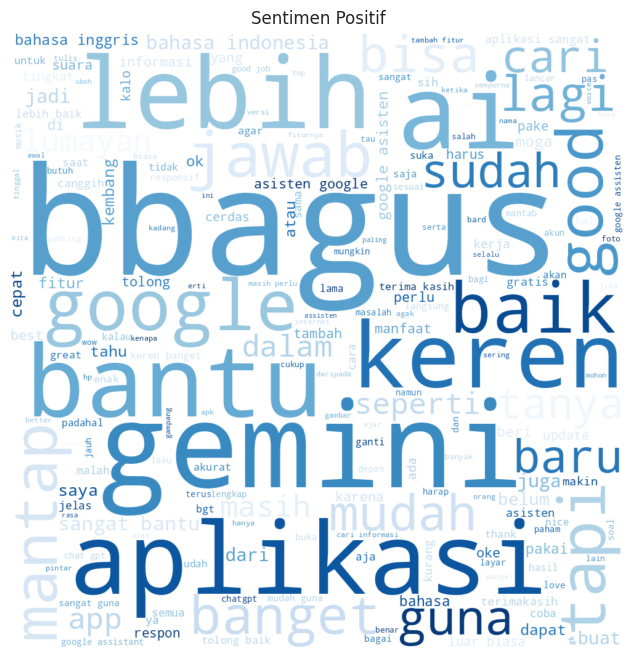

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

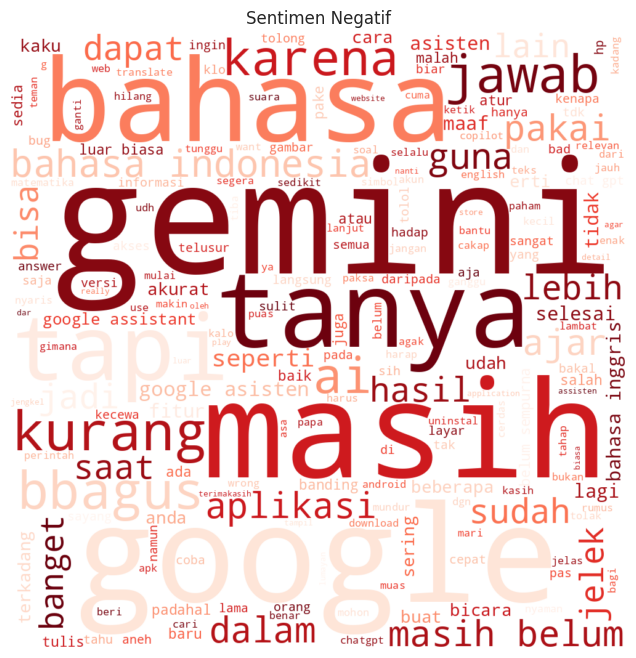

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

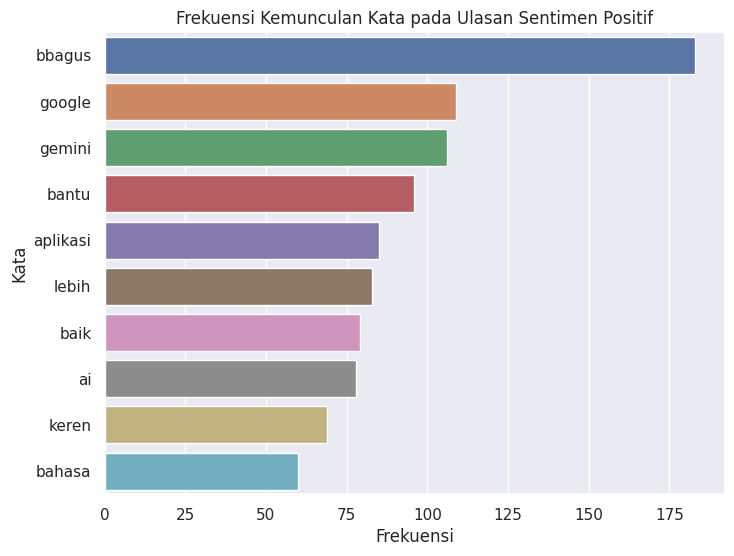

In [44]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [45]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
  bbagus        183
  google        109
  gemini        106
   bantu         96
aplikasi         85
   lebih         83
    baik         79
      ai         78
   keren         69
  bahasa         60


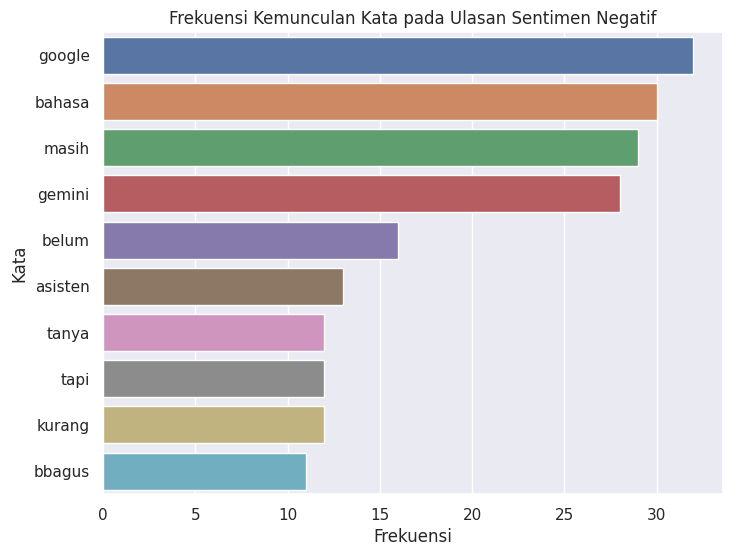

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

   kata  frekuensi
 google         32
 bahasa         30
  masih         29
 gemini         28
  belum         16
asisten         13
  tanya         12
   tapi         12
 kurang         12
 bbagus         11


In [48]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    812
1    120
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [49]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

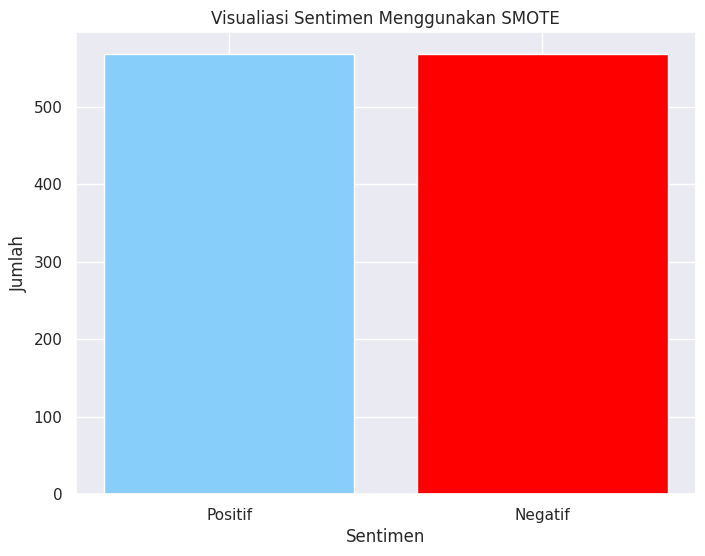

In [52]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [53]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [55]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [56]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8357142857142857

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.97      0.84      0.90       244
     Negatif       0.43      0.83      0.57        36

    accuracy                           0.84       280
   macro avg       0.70      0.83      0.73       280
weighted avg       0.90      0.84      0.86       280



In [57]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[204  40]
 [  6  30]]

True Positives (TP) =  204

True Negatives (TN) =  30

False Positives (FP) =  40

False Negatives (FN) =  6

Accuracy =  0.8357142857142857


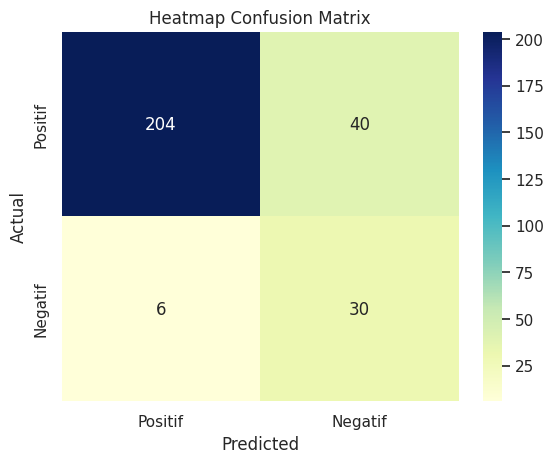

In [58]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [59]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [60]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8357


In [61]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1643


# **Testing**

In [66]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Ai nya tidak bisa atau tidak tahu seseorang yang kita tanyakan seperti nama artis atau orang terkenal lainnya, malah Ai dari aplikasi lainnya yang tahu. Dan jawaban nya terkadang selalu tidak sesuai dengan pertanyaan yang kita tanyakan. Padahal pas versi ujicoba/versi Beta selalu diunggulkan tapi ternyata tidak/masih belum sesuai ekspektasi
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 71.41%
Probabilitas: 71.41374508193722 %


In [65]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Secara keseluruhan sudah bagus seperti - Memperoleh bantuan untuk menulis, bertukar ide, belajar, dan lainnya - Merangkum dan menemukan info cepat dari Gmail atau Google Drive - Menggunakan teks, suara, foto, dan kamera Anda untuk mendapatkan bantuan dengan cara baru. Namun saya sarankan untuk menambahkan satu fitur lagi, yaitu fitur upload video yang dimana memungkinkan google Gemini untuk menganalisis video, memberikan deskripsi video, membuat story telling tentang video dll selebihnya ok 👍
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 69.89%
Probabilitas: 69.890158327467 %
